In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

#The first six cells are for the data processing. It is relativley standard across all of our notebooks
grades_final = pd.read_csv('new_grades_statistics')

grades_final['date'] =  pd.to_datetime(grades_final['date'])

In [2]:
probability_lists = []

for i in range(46191):
    if i == 0:
        probability_lists.append(grades_final['probability'][:8].values)
    else:
        probability_lists.append(grades_final['probability'][i * 8:8 * (i+1)].values)
        


In [3]:
grades_final['gpa_grade_values'] = [[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]] * len(grades_final)

In [4]:
grades_final = grades_final.drop_duplicates('unique_course_name')

grades_final

,date,unique_course_name,semester,subject_code,course_title,instructors,total_grades,course_name,letter_grade,count,probability,mean,mode,median,skew,std,kurt,gpa_grade_values
0,2014-12-15,AAAS_100__FS14___YOMAIRA C FIGUEROA,FS14,AAAS,Race and Community,YOMAIRA C FIGUEROA,24,AAAS_100,4.0,7,0.291667,2.875000,4.0,3.0,-1.182836,1.174823,3.597992,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]"
8,2015-12-15,AAAS_100__FS15___YOMAIRA C FIGUEROA,FS15,AAAS,Race and Community,YOMAIRA C FIGUEROA,35,AAAS_100,4.0,11,0.314286,3.128571,3.5,3.5,-1.633707,1.064645,5.011626,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]"
16,2016-12-15,AAAS_100__FS16___XHERCIS MENDEZ,FS16,AAAS,Race and Community,XHERCIS MENDEZ,41,AAAS_100,4.0,18,0.439024,3.512195,4.0,3.5,-1.891232,0.619675,7.496914,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]"
24,2017-12-15,AAAS_100__FS17___XHERCIS MENDEZ,FS17,AAAS,Race and Community,XHERCIS MENDEZ,40,AAAS_100,4.0,24,0.600000,3.600000,4.0,4.0,-1.339202,0.583095,3.769031,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]"
32,2018-12-15,AAAS_100__FS18___TAMARA T BUTLER,FS18,AAAS,Race and Community,TAMARA T BUTLER,35,AAAS_100,4.0,13,0.371429,3.285714,4.0,3.5,-2.332432,1.077601,7.489730,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]"
40,2016-12-15,AAAS_300__FS16___GLENN A CHAMBERS JR,FS16,AAAS,Survey in Africana,GLENN A CHAMBERS JR,24,AAAS_300,4.0,15,0.625000,3.750000,4.0,4.0,-1.060660,0.353553,2.750000,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]"
48,2017-12-15,AAAS_300__FS17___GLENN A CHAMBERS JR,FS17,AAAS,Survey in Africana,GLENN A CHAMBERS JR,12,AAAS_300,4.0,4,0.333333,3.208333,4.0,3.5,-0.732125,0.748842,2.812229,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]"
56,2016-05-15,AAAS_390__SS16___TERRION L WILLIAMSON,SS16,AAAS,Spec Topics Black Africana Std,TERRION L WILLIAMSON,21,AAAS_390,4.0,7,0.333333,3.309524,4.0,3.5,-2.428514,0.892778,9.336086,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]"
64,2017-05-15,AAAS_390__SS17___TAMARA T BUTLER,SS17,AAAS,Spec Topics Black Africana Std,TAMARA T BUTLER,15,AAAS_390,4.0,8,0.533333,3.600000,4.0,4.0,-1.105651,0.522813,2.911660,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]"
72,2018-05-15,AAAS_390__SS18___TAMARA T BUTLER,SS18,AAAS,Spec Topics Black Africana Std,TAMARA T BUTLER,17,AAAS_390,4.0,10,0.588235,3.588235,4.0,4.0,-1.044719,0.574848,2.485938,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]"


In [5]:
grades_final["probability_lists"] = probability_lists

In [6]:
grades_final = grades_final.reset_index()

grades_final = grades_final.drop('index', axis = 1)

grades_final

,date,unique_course_name,semester,subject_code,course_title,instructors,total_grades,course_name,letter_grade,count,probability,mean,mode,median,skew,std,kurt,gpa_grade_values,probability_lists
0,2014-12-15,AAAS_100__FS14___YOMAIRA C FIGUEROA,FS14,AAAS,Race and Community,YOMAIRA C FIGUEROA,24,AAAS_100,4.0,7,0.291667,2.875000,4.0,3.0,-1.182836,1.174823,3.597992,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.2916666666666667, 0.16666666666666666, 0.16..."
1,2015-12-15,AAAS_100__FS15___YOMAIRA C FIGUEROA,FS15,AAAS,Race and Community,YOMAIRA C FIGUEROA,35,AAAS_100,4.0,11,0.314286,3.128571,3.5,3.5,-1.633707,1.064645,5.011626,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.3142857142857143, 0.3428571428571429, 0.114..."
2,2016-12-15,AAAS_100__FS16___XHERCIS MENDEZ,FS16,AAAS,Race and Community,XHERCIS MENDEZ,41,AAAS_100,4.0,18,0.439024,3.512195,4.0,3.5,-1.891232,0.619675,7.496914,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.4390243902439024, 0.3414634146341464, 0.097..."
3,2017-12-15,AAAS_100__FS17___XHERCIS MENDEZ,FS17,AAAS,Race and Community,XHERCIS MENDEZ,40,AAAS_100,4.0,24,0.600000,3.600000,4.0,4.0,-1.339202,0.583095,3.769031,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.6, 0.15, 0.15, 0.05, 0.05, 0.0, 0.0, 0.0]"
4,2018-12-15,AAAS_100__FS18___TAMARA T BUTLER,FS18,AAAS,Race and Community,TAMARA T BUTLER,35,AAAS_100,4.0,13,0.371429,3.285714,4.0,3.5,-2.332432,1.077601,7.489730,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.37142857142857133, 0.37142857142857133, 0.1..."
5,2016-12-15,AAAS_300__FS16___GLENN A CHAMBERS JR,FS16,AAAS,Survey in Africana,GLENN A CHAMBERS JR,24,AAAS_300,4.0,15,0.625000,3.750000,4.0,4.0,-1.060660,0.353553,2.750000,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.625, 0.25, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0]"
6,2017-12-15,AAAS_300__FS17___GLENN A CHAMBERS JR,FS17,AAAS,Survey in Africana,GLENN A CHAMBERS JR,12,AAAS_300,4.0,4,0.333333,3.208333,4.0,3.5,-0.732125,0.748842,2.812229,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.3333333333333333, 0.16666666666666666, 0.25..."
7,2016-05-15,AAAS_390__SS16___TERRION L WILLIAMSON,SS16,AAAS,Spec Topics Black Africana Std,TERRION L WILLIAMSON,21,AAAS_390,4.0,7,0.333333,3.309524,4.0,3.5,-2.428514,0.892778,9.336086,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.3333333333333333, 0.3333333333333333, 0.238..."
8,2017-05-15,AAAS_390__SS17___TAMARA T BUTLER,SS17,AAAS,Spec Topics Black Africana Std,TAMARA T BUTLER,15,AAAS_390,4.0,8,0.533333,3.600000,4.0,4.0,-1.105651,0.522813,2.911660,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.5333333333333333, 0.26666666666666666, 0.06..."
9,2018-05-15,AAAS_390__SS18___TAMARA T BUTLER,SS18,AAAS,Spec Topics Black Africana Std,TAMARA T BUTLER,17,AAAS_390,4.0,10,0.588235,3.588235,4.0,4.0,-1.044719,0.574848,2.485938,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.5882352941176471, 0.17647058823529413, 0.05..."


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def my_regress(x,y):
    ##########################################################################################################################
    # This function preforms a simple linear regression on total students and mean GPA data per course code                  #
    #                                                                                                                        #
    # Inputs:                                                                                                                #   
    #       x: The total students array for a given major                                                                    #
    #       y: The mean GPA array for a give major                                                                           #
    # Returns:                                                                                                               #
    #       m: The slope for the fitted line                                                                                 #
    #       b: The y-intercept for the fitted line                                                                           #
    ##########################################################################################################################
    

    mean_x = np.mean(x)

    mean_y = np.mean(y)

    N = x.size

    

    xy_prod_sum = 0.0

    xx_prod_sum = 0.0

    

    for index in range(N):

        xy_prod_sum += x[index]*y[index]

        xx_prod_sum += x[index]**2

        

    m = (xy_prod_sum - N*mean_x*mean_y)/(xx_prod_sum - N*mean_x**2)

    b = mean_y - m*mean_x

    

    return m,b

In [27]:
def class_mean_relation(courseA, courseB):
    ##########################################################################################################################
    # This function preforms the linear regression fuction on two inputed course codes. It scatters the data points, and     #
    # plots the fitted line. These are done in different plots to aid in comparison. Statistical p and t values are printed. #
    #                                                                                                                        #
    # Inputs:                                                                                                                #   
    #       courseA: The first course code that you want to look at                                                          #
    #       courseB: The second course code that you wnt to look at                                                          #
    # Outputs:                                                                                                               #
    #       The scattered data points, fitted line, t-value, and p-value for each course code                                #
    ########################################################################################################################## 
    
    total = [] 
    mean = []
    total2 = []
    mean2 = []
    #This loop makes lists of the final grades and mean GPA for the two majors we want to look at
    for i in range(len(grades_final)):
        test = grades_final.loc[i]
        if test['subject_code'] == courseA:
            if test['total_grades'] > 10:
                total.append(test['total_grades'])
                mean.append(test['mean'])
        if test['subject_code'] == courseB:
            if test['total_grades'] > 10:
                total2.append(test['total_grades'])
                mean2.append(test['mean'])
    
    #This preforms the linear regression on both of the course codes
    m, b = my_regress(np.array(total),np.array(mean))
    m2, b2 = my_regress(np.array(total2),np.array(mean2))
    
    #This creates an array of the fitted line's values
    x1 = np.linspace(0,max(total),max(total))
    x2 = np.linspace(0,max(total2),max(total2))
    f = m*x1+b
    f2 = m2*x2+b2
    
    #Plots the first course code's data and fit line, and prints the t and p values
    plt.figure(1)
    plt.scatter(total,mean, color = 'b')
    plt.plot(x1,f, color = 'r')
    plt.title(courseA)
    plt.xlabel('Class Size')
    plt.ylabel('Mean GPA')
    
    t1, p1 = ttest_ind(total,mean)
    print(courseA, "has a t value of", t1,"and a p value of",p1)
    
    #Plots the first course code's data and fit line, and prints the t and p values
    plt.figure(2)
    plt.scatter(total2,mean2, color = 'r')
    plt.plot(x2,f2,color = 'b')
    plt.title(courseB)
    plt.xlabel('Class Size')
    plt.ylabel('Mean GPA')
    
    t2, p2 = ttest_ind(total2,mean2)
    print(courseB, "has a t value of", t2,"and a p value of",p2)  
    

PHY has a t value of 18.425858119842438 and a p value of 2.9419056316867633e-65
FI has a t value of 17.857899253538164 and a p value of 1.8933750925198154e-62


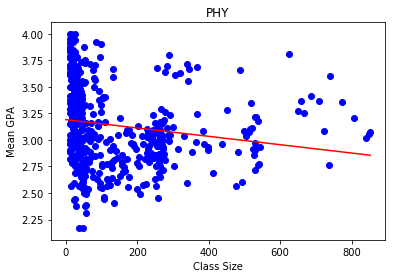

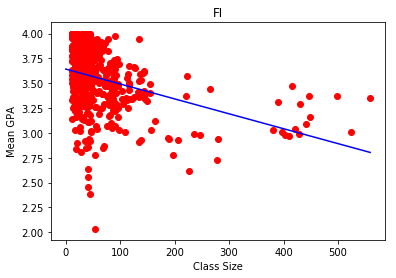

In [28]:
#Runs the class_mean_relation function for physcis and finance classes
class_mean_relation('PHY','FI')